In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyspark.sql
from pyspark.sql import Row
spark = SparkSession.builder.appName('722').getOrCreate()

In [20]:
df = spark.read.csv("./suicide.csv",inferSchema=True,header=True)

In [ ]:
df.show(5)

In [10]:
df.count()

27820

In [11]:
len(df.columns)

12

In [8]:
df.select("year").describe().show()

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|             27820|
|   mean|2001.2583752695903|
| stddev| 8.469055024441408|
|    min|              1985|
|    max|              2016|
+-------+------------------+



In [9]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [10]:
df.select("country","year","sex","age","suicides/100k pop","HDI for year","gdp_per_capita ($)" ).describe().show()

+-------+----------+------------------+------+-----------+------------------+-------------------+------------------+
|summary|   country|              year|   sex|        age| suicides/100k pop|       HDI for year|gdp_per_capita ($)|
+-------+----------+------------------+------+-----------+------------------+-------------------+------------------+
|  count|     27820|             27820| 27820|      27820|             27820|               8364|             27820|
|   mean|      null|2001.2583752695903|  null|       null|12.816097411933894| 0.7766011477761785|16866.464414090584|
| stddev|      null| 8.469055024441408|  null|       null| 18.96151101450326|0.09336670859029984|18887.576472205576|
|    min|   Albania|              1985|female|15-24 years|               0.0|              0.483|               251|
|    max|Uzbekistan|              2016|  male|  75+ years|            224.97|              0.944|            126352|
+-------+----------+------------------+------+-----------+------

In [11]:
df.select("suicides_no","population","country-year","generation"," gdp_for_year ($) " ).describe().show()

+-------+------------------+------------------+--------------+----------+------------------+
|summary|       suicides_no|        population|  country-year|generation| gdp_for_year ($) |
+-------+------------------+------------------+--------------+----------+------------------+
|  count|             27820|             27820|         27820|     27820|             27820|
|   mean|242.57440690150972|1844793.6173975556|          null|      null|              null|
| stddev| 902.0479168336403|3911779.4417563565|          null|      null|              null|
|    min|                 0|               278|   Albania1987|   Boomers| 1,002,219,052,968|
|    max|             22338|          43805214|Uzbekistan2014|    Silent|       997,007,926|
+-------+------------------+------------------+--------------+----------+------------------+



In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyspark.sql
from pyspark.sql import Row

(array([1.5401e+04, 4.7670e+03, 2.6800e+03, 1.7290e+03, 9.5700e+02,
        6.2000e+02, 3.6400e+02, 2.8100e+02, 2.1400e+02, 1.8200e+02,
        1.7200e+02, 1.5200e+02, 8.1000e+01, 7.5000e+01, 3.8000e+01,
        3.2000e+01, 2.7000e+01, 1.4000e+01, 4.0000e+00, 7.0000e+00,
        5.0000e+00, 3.0000e+00, 2.0000e+00, 8.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.   ,   7.499,  14.998,  22.497,  29.996,  37.495,  44.994,
         52.493,  59.992,  67.491,  74.99 ,  82.489,  89.988,  97.487,
        104.986, 112.485, 119.984, 127.483, 134.982, 142.481, 149.98 ,
        157.479, 164.978, 172.477, 179.976, 187.475, 194.974, 202.473,
        209.972, 217.471, 224.97 ]),
 <a list of 30 Patch objects>)

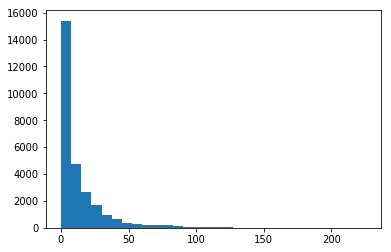

In [13]:
suicide_rate = df.toPandas()["suicides/100k pop"].values.tolist()
plt.hist(suicide_rate, bins=30)

Text(0,0.5,'suicide_rate')

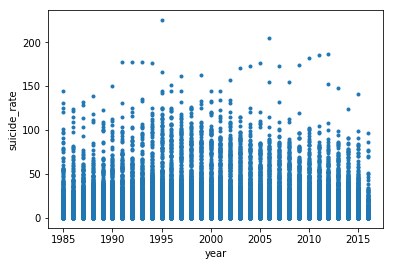

In [14]:
suicide_rate = df.toPandas()["suicides/100k pop"].values.tolist()
year = df.toPandas()["year"].values.tolist()
plt.scatter(year, suicide_rate, marker=".")
plt.xlabel("year")
plt.ylabel("suicide_rate")

In [15]:
import os, sys
df.corr("suicides/100k pop", "year")

-0.03903679721784211

In [16]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [17]:
dfll =  df.drop('country','sex', 'age', 'country-year', ' gdp_for_year ($) ','generation')
for i in dfll.columns: 
    print(i, df.corr("suicides/100k pop", i))

year -0.03903679721784211
suicides_no 0.30660445126778024
population 0.008284973053478566
suicides/100k pop 1.0
HDI for year -0.022902775229915146
gdp_per_capita ($) 0.0017851337973437866


In [22]:
dfp = df.toPandas()

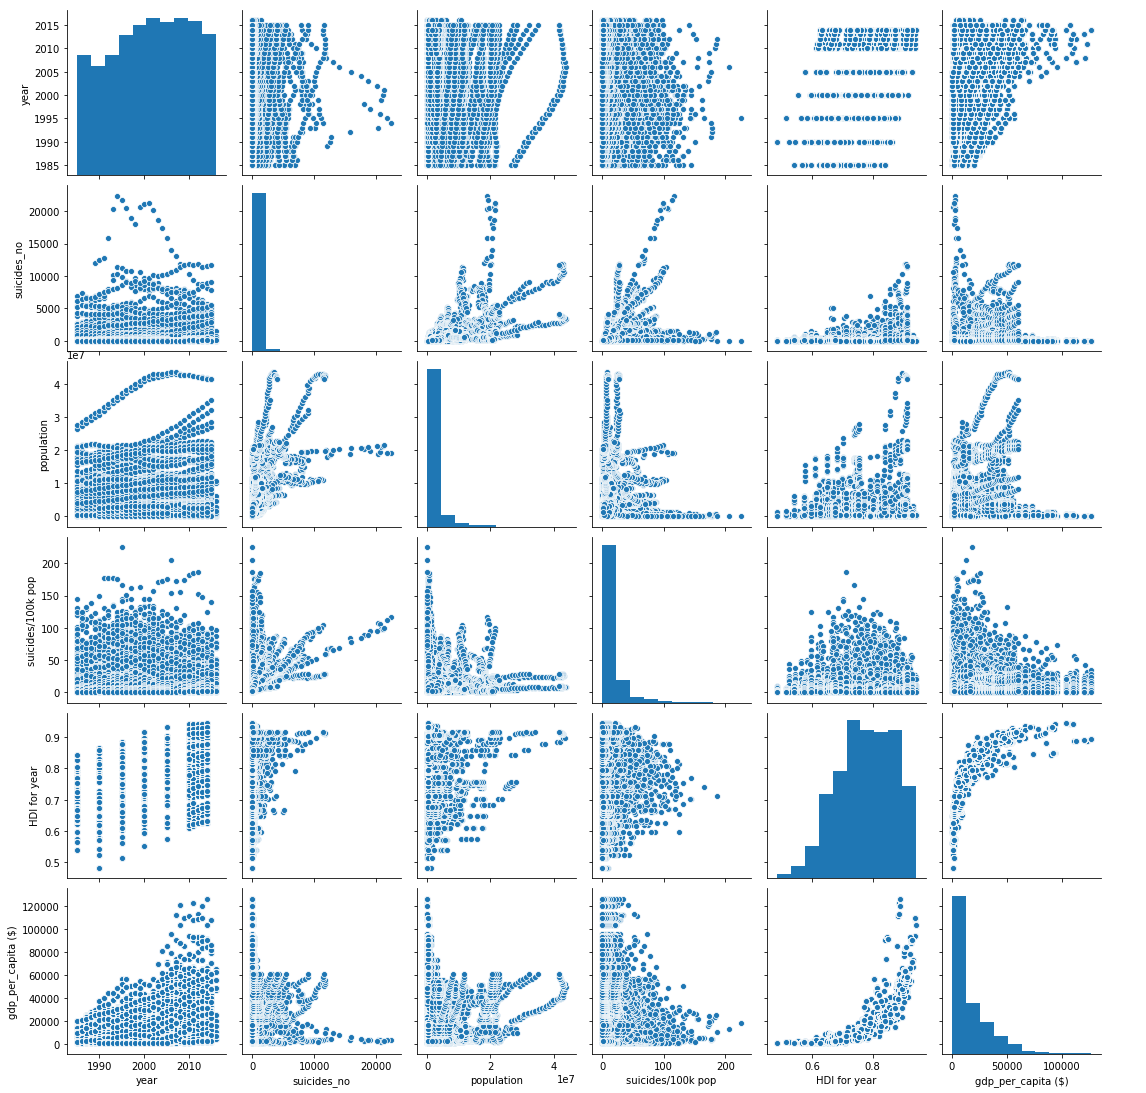

In [68]:
import seaborn as sns
sns.pairplot(dfp)
plt.show()

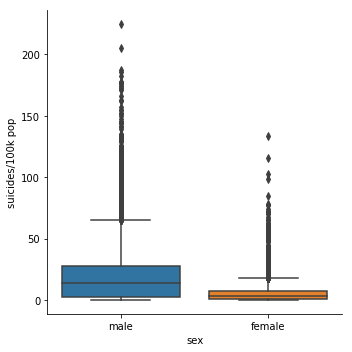

In [69]:
sns.catplot(x="sex", y="suicides/100k pop", kind = "box", data=dfp)

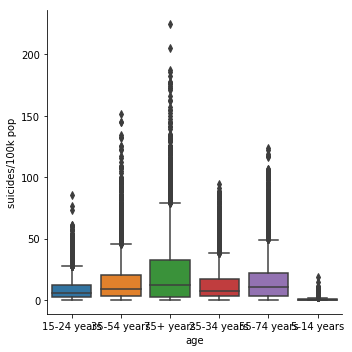

In [21]:
sns.catplot(x="age", y="suicides/100k pop", kind = "box", data=dfp)

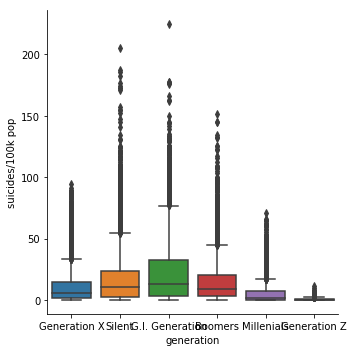

In [59]:
sns.catplot(x="generation", y="suicides/100k pop", kind = "box", data=dfp)

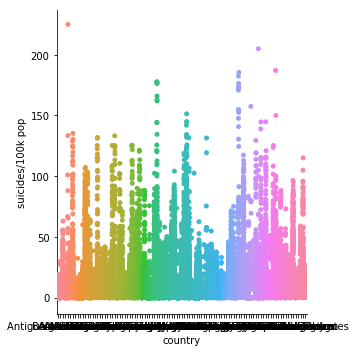

In [22]:
sns.catplot(x="country", y="suicides/100k pop", data=dfp)

In [23]:
dfp.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [23]:
import pyspark.sql.functions as F
from pyspark.sql.functions import isnull
df_agg = df.agg(*[F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns])
from functools import reduce
df_agg_col = reduce(lambda a, b: a.union(b),
                    (df_agg.select(F.lit(c).alias("Column_Name"), F.col(c).alias("NULL_Count")) for c in df_agg.columns ))
df_agg_col.show(23)

+------------------+----------+
|       Column_Name|NULL_Count|
+------------------+----------+
|           country|         0|
|              year|         0|
|               sex|         0|
|               age|         0|
|       suicides_no|         0|
|        population|         0|
| suicides/100k pop|         0|
|      country-year|         0|
|      HDI for year|     19456|
| gdp_for_year ($) |         0|
|gdp_per_capita ($)|         0|
|        generation|         0|
+------------------+----------+



In [25]:
dfp = df.toPandas()
Q1 = dfp.quantile(0.25)
Q3 = dfp.quantile(0.75)
IQR = Q3 - Q1


In [26]:
Q1 - 1.5*IQR

year                     1975.500
suicides_no              -189.000
population           -1985468.625
suicides/100k pop         -22.630
HDI for year                0.500
gdp_per_capita ($)     -28693.500
dtype: float64

In [27]:
Q3 + 1.5*IQR

year                     2027.500
suicides_no               323.000
population            3569110.375
suicides/100k pop          40.170
HDI for year                1.068
gdp_per_capita ($)      57014.500
dtype: float64

In [28]:
sum(dfp["year"] < 1975.50) + sum(dfp["year"] > 2027.500)


0

In [29]:
sum(dfp["suicides/100k pop"] < -22.63) + sum(dfp["suicides/100k pop"] > 40.170)


2046

In [30]:
sum(dfp["HDI for year"] < 0.50) + sum(dfp["HDI for year"] > 1.068)


12

In [31]:
sum(dfp["gdp_per_capita ($)"] < -28693.50) + sum(dfp["gdp_per_capita ($)"] > 57014.500)

1016

In [24]:
df = df.drop('population','suicides_no','country-year')
df.show(5)


+-------+----+------+-----------+-----------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides/100k pop|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|             6.71|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|             5.19|        null|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|             4.83|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|             4.59|        null|     2,156,624,900|               796|G.I. Generation|
|Albania|1987|  male|25-34 years|             3.28|        null|     2,156,624,900|               796|        Boomers|
+-------+----+------+-----------+---------------

In [25]:
from pyspark.sql.functions import mean
mean_hdi = df.select(mean(df['HDI for year'])).collect()
mean_hdi = mean_hdi[0][0]
df.na.fill(mean_hdi, subset=['HDI for year']).show(5)


+-------+----+------+-----------+-----------------+------------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides/100k pop|      HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------------+------------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|             6.71|0.7766011477761785|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|             5.19|0.7766011477761785|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|             4.83|0.7766011477761785|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|             4.59|0.7766011477761785|     2,156,624,900|               796|G.I. Generation|
|Albania|1987|  male|25-34 years|             3.28|0.7766011477761785|     2,156,624,900|               796|        Boomers|


In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('operations').getOrCreate()

In [9]:
Q1 - 1.5*IQR

NameError: name 'Q1' is not defined

In [ ]:
Q3 + 1.5*IQR

In [27]:
df = df.filter( (df["suicides/100k pop"] > -22.63) & (df["suicides/100k pop"] < 40.170))
df = df.filter( (df["gdp_per_capita ($)"] > -28693.50) & (df["gdp_per_capita ($)"] < 57014.500))

In [28]:
df.count()

24785

In [29]:
len(df.columns)

9

In [30]:
#df = spark.read.csv("./suicide.csv",inferSchema=True,header=True)
#df1 = spark.read.csv("./suicide-1.csv",inferSchema=True,header=True)
#df = df.union(df1)

In [31]:
from pyspark.sql.functions import col, expr, when
old_or_young = when(
    col("age") == "55-74 years", 1).when(col("age") == "75+ years", 1).otherwise(0)

In [32]:
df_ad = df.withColumn("old_or_young", old_or_young)

In [33]:
df_ad.show(5)

+-------+----+------+-----------+-----------------+------------+------------------+------------------+---------------+------------+
|country|year|   sex|        age|suicides/100k pop|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|old_or_young|
+-------+----+------+-----------+-----------------+------------+------------------+------------------+---------------+------------+
|Albania|1987|  male|15-24 years|             6.71|        null|     2,156,624,900|               796|   Generation X|           0|
|Albania|1987|  male|35-54 years|             5.19|        null|     2,156,624,900|               796|         Silent|           0|
|Albania|1987|female|15-24 years|             4.83|        null|     2,156,624,900|               796|   Generation X|           0|
|Albania|1987|  male|  75+ years|             4.59|        null|     2,156,624,900|               796|G.I. Generation|           1|
|Albania|1987|  male|25-34 years|             3.28|        null|     2,156,6

In [34]:
df_ad.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)
 |-- old_or_young: integer (nullable = false)



In [35]:
from pyspark.sql.types import IntegerType
#data_df = data_df.withColumn("Plays", data_df["Plays"].cast(IntegerType()))
#data_df = data_df.withColumn("drafts", data_df["drafts"].cast(IntegerType()))

ttt = df_ad
tttp = ttt.toPandas()
tttp[' gdp_for_year ($) '] =tttp[' gdp_for_year ($) '].apply(lambda x: "".join(x.split(','))).astype('int')
#tttp.dtypes

tttp
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()
spark_df = spark.createDataFrame(tttp)
spark_df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : long (nullable = true)
 |-- gdp_per_capita ($): long (nullable = true)
 |-- generation: string (nullable = true)
 |-- old_or_young: long (nullable = true)



In [36]:
ttt.select(' gdp_for_year ($) ').show(4)

+------------------+
| gdp_for_year ($) |
+------------------+
|     2,156,624,900|
|     2,156,624,900|
|     2,156,624,900|
|     2,156,624,900|
+------------------+
only showing top 4 rows



In [37]:
df_ad.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)
 |-- old_or_young: integer (nullable = false)



In [38]:
sex_new = when(
    col("sex") == "male", 1).otherwise(0)
 
age_new = when(
    col("age") == "5-14 years", 0).when(col("age") == "15-24 years", 1).when(col("age") == "25-34 years", 2).when(col("age") == "35-54 years", 3).when(col("age") == "55-74 years", 4).when(col("age") == "75+ years", 5)


generation_new = when(
    col("generation") == "Boomers", 0).when(col("generation") == "G.I. Generation", 1).when(col("generation") == "Generation X", 2).when(col("generation") == "Generation Z", 3).when(col("generation") == "Millenials", 4).when(col("generation") == "Silent", 5)


In [39]:
df_ad = df_ad.withColumn("sex_new", sex_new)

In [40]:
df_ad = df_ad.withColumn("age_new", age_new)

In [41]:
df_ad = df_ad.withColumn("generation_new", generation_new)

In [42]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol='country', outputCol="country ID")
df_ad = indexer.fit(df_ad).transform(df_ad)

In [43]:
from pyspark.sql.functions import *
df_ad = df_ad.withColumn(' gdp_for_year ($) ', regexp_replace(' gdp_for_year ($) ', ',' , ''))

In [44]:
from pyspark.sql.types import LongType
df_ad =  df_ad.withColumn(' gdp_for_year ($) ', df_ad[' gdp_for_year ($) '].cast(LongType()))

df_ad.show(5)
df_ad.printSchema()

+-------+----+------+-----------+-----------------+------------+------------------+------------------+---------------+------------+-------+-------+--------------+----------+
|country|year|   sex|        age|suicides/100k pop|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|old_or_young|sex_new|age_new|generation_new|country ID|
+-------+----+------+-----------+-----------------+------------+------------------+------------------+---------------+------------+-------+-------+--------------+----------+
|Albania|1987|  male|15-24 years|             6.71|        null|        2156624900|               796|   Generation X|           0|      1|      1|             2|      56.0|
|Albania|1987|  male|35-54 years|             5.19|        null|        2156624900|               796|         Silent|           0|      1|      3|             5|      56.0|
|Albania|1987|female|15-24 years|             4.83|        null|        2156624900|               796|   Generation X|           0

In [45]:
aaa = spark.read.csv("./suicide.csv",inferSchema=True,header=True)

In [46]:
df_ad = df_ad.drop('country','sex','age','generation','HDI for year')

In [47]:
df_ad.printSchema()

root
 |-- year: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |--  gdp_for_year ($) : long (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- old_or_young: integer (nullable = false)
 |-- sex_new: integer (nullable = false)
 |-- age_new: integer (nullable = true)
 |-- generation_new: integer (nullable = true)
 |-- country ID: double (nullable = true)



In [48]:
df_ad = df_ad.filter( (df_ad["suicides/100k pop"] != 0))
df_ad = df_ad.withColumn('suicides/100k pop',log('suicides/100k pop'))
df_ad.show(5)

+----+------------------+------------------+------------------+------------+-------+-------+--------------+----------+
|year| suicides/100k pop| gdp_for_year ($) |gdp_per_capita ($)|old_or_young|sex_new|age_new|generation_new|country ID|
+----+------------------+------------------+------------------+------------+-------+-------+--------------+----------+
|1987|1.9035989509835904|        2156624900|               796|           0|      1|      1|             2|      56.0|
|1987|1.6467336971777973|        2156624900|               796|           0|      1|      3|             5|      56.0|
|1987|1.5748464676644813|        2156624900|               796|           0|      0|      1|             2|      56.0|
|1987|1.5238800240724537|        2156624900|               796|           1|      1|      5|             1|      56.0|
|1987|1.1878434223960523|        2156624900|               796|           0|      1|      2|             0|      56.0|
+----+------------------+------------------+----

(array([   5.,    0.,    8.,    0.,   14.,    0.,   10.,   16.,    9.,
          37.,   19.,   48.,   49.,   70.,   92.,  107.,  117.,  185.,
         248.,  244.,  221.,  212.,  279.,  252.,  287.,  391.,  381.,
         361.,  368.,  435.,  524.,  515.,  533.,  614.,  704.,  759.,
         866.,  829.,  976.,  970.,  976., 1018., 1014., 1029.,  949.,
         917.,  935.,  836.,  667.,  560.]),
 array([-3.91202301, -3.75992512, -3.60782723, -3.45572934, -3.30363145,
        -3.15153356, -2.99943567, -2.84733778, -2.69523989, -2.543142  ,
        -2.39104411, -2.23894622, -2.08684833, -1.93475044, -1.78265255,
        -1.63055466, -1.47845677, -1.32635888, -1.17426099, -1.0221631 ,
        -0.87006521, -0.71796732, -0.56586943, -0.41377154, -0.26167365,
        -0.10957577,  0.04252212,  0.19462001,  0.3467179 ,  0.49881579,
         0.65091368,  0.80301157,  0.95510946,  1.10720735,  1.25930524,
         1.41140313,  1.56350102,  1.71559891,  1.8676968 ,  2.01979469,
         2.17189

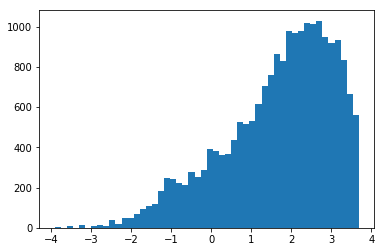

In [49]:
logsuicide_rate = df_ad.toPandas()["suicides/100k pop"].values.tolist()
plt.hist(logsuicide_rate, bins=50)

In [50]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["year", " gdp_for_year ($) ", "gdp_per_capita ($)","old_or_young", "sex_new", "age_new", "generation_new","country ID"],
    outputCol="features")

In [51]:
output = assembler.transform(df_ad)

In [52]:
output.printSchema()

root
 |-- year: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |--  gdp_for_year ($) : long (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- old_or_young: integer (nullable = false)
 |-- sex_new: integer (nullable = false)
 |-- age_new: integer (nullable = true)
 |-- generation_new: integer (nullable = true)
 |-- country ID: double (nullable = true)
 |-- features: vector (nullable = true)



In [53]:
output.head(1)

[Row(year=1987, suicides/100k pop=1.9035989509835904,  gdp_for_year ($) =2156624900, gdp_per_capita ($)=796, old_or_young=0, sex_new=1, age_new=1, generation_new=2, country ID=56.0, features=DenseVector([1987.0, 2156624900.0, 796.0, 0.0, 1.0, 1.0, 2.0, 56.0]))]

In [54]:
final_data = output.select("features",'suicides/100k pop')

In [55]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [56]:
train_data.describe().show()

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|             16563|
|   mean|1.6825406604754245|
| stddev|1.3612259909527116|
|    min|-3.912023005428146|
|    max|3.6928714753834737|
+-------+------------------+



In [57]:
test_data.describe().show()

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|              4093|
|   mean|1.6454670258764224|
| stddev|1.3858247316139274|
|    min|-3.912023005428146|
|    max|3.6901286735143684|
+-------+------------------+



In [58]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='suicides/100k pop')

In [59]:
lrModel = lr.fit(train_data)

In [60]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))


Coefficients: [-0.014364413807998914,1.6786170325324811e-15,1.0242380090941529e-05,-1.2282223357823827,0.9952139446023389,0.732103423795721,0.016821731649412287,0.007013541037449656] Intercept: 28.084480981296505


In [61]:
lmim = pd.DataFrame({'Fields':["year"," gdp_for_year ($) ", "gdp_per_capita ($)","old_or_young", "sex_new", "age_new", "generation_new","country ID"],'Coef':[-0.011048769523858089,2.816303742543238e-15,5.058466994986258e-06,-1.1860222328941923, 1.16682645448624,0.7707488777861422,0.012344816667810092, 0.0007330390177361307]},index=[0, 1, 2, 3,4,5,6,7])


In [62]:
print(lmim)

           Coef              Fields
0 -1.104877e-02                year
1  2.816304e-15   gdp_for_year ($) 
2  5.058467e-06  gdp_per_capita ($)
3 -1.186022e+00        old_or_young
4  1.166826e+00             sex_new
5  7.707489e-01             age_new
6  1.234482e-02      generation_new
7  7.330390e-04          country ID


In [63]:
test_results = lrModel.evaluate(test_data)
test_results

In [64]:
predictions_lnr = lrModel.transform(test_data)

In [65]:
predictions_lnr.select("features", "suicides/100k pop", "prediction").show(5)

+--------------------+------------------+------------------+
|            features| suicides/100k pop|        prediction|
+--------------------+------------------+------------------+
|(8,[0,1,2,5],[199...| 2.427454075039915|0.9803327801643853|
|(8,[0,1,2,5],[199...| 2.468946630209271| 1.701708451769452|
|(8,[0,1,2,5],[199...|1.7984040119467235| 1.665939881993559|
|(8,[0,1,2,5],[199...| 2.400618833265411|1.6085031325640209|
|(8,[0,1,2,5],[200...|1.5173226235262947|1.5538098389370134|
+--------------------+------------------+------------------+
only showing top 5 rows



In [66]:
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|  1.4471212948755299|
|  0.7672381784398188|
|  0.1324641299531646|
|  0.7921157007013901|
|-0.03648721541071...|
|  1.8210812689786522|
|   1.230199472718505|
|  0.5578981765485758|
|  1.7803405835589525|
|  1.8303632475241618|
|   1.023588002442907|
|-1.71681973035298...|
| -0.8371584248032007|
| -1.6711548512680445|
| 0.09264196106857092|
| -0.2757029666021973|
| 0.37916140011123745|
| -1.7013539580690604|
|   -0.64941641267797|
|-0.15865139914902304|
+--------------------+
only showing top 20 rows



In [67]:
print("RMSE of Linear Regression Model: {}".format(test_results.rootMeanSquaredError))

RMSE of Linear Regression Model: 1.017567391407736


In [68]:
print("R-square of Linear Regression Model: {}".format(test_results.r2))

R-square of Linear Regression Model: 0.46071807163094314


In [69]:
print("MSE of Linear Regression Model: {}".format(test_results.meanSquaredError))

MSE of Linear Regression Model: 1.035443396056345


In [70]:
print("Explained variance of Linear Regression Model: {}".format(test_results.meanAbsoluteError))

Explained variance of Linear Regression Model: 0.7941972983333312


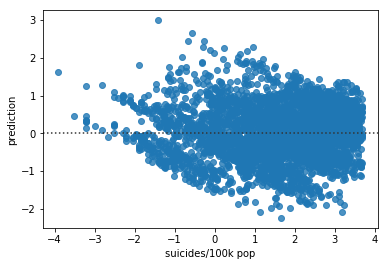

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(predictions_lnr.select("suicides/100k pop").toPandas(),predictions_lnr.select("prediction").toPandas())

In [72]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

In [73]:
rf = RandomForestRegressor(labelCol="suicides/100k pop", maxDepth = 10, numTrees=10, maxBins = 101)
model_rf = rf.fit(train_data)

In [74]:
 model_rf.featureImportances

SparseVector(8, {0: 0.0109, 1: 0.0218, 2: 0.0181, 3: 0.0189, 4: 0.1405, 5: 0.5022, 6: 0.0183, 7: 0.2693})

In [75]:
rfim = pd.DataFrame({'Fields':["year"," gdp_for_year ($) ", "gdp_per_capita ($)","old_or_young", "sex_new", "age_new", "generation_new","country ID"],'Importance':[0.0131,0.0175,0.0147,0.0365, 0.1696,0.4267,0.0356, 0.2862]},index=[0, 1, 2, 3,4,5,6,7])


In [76]:
print(rfim)

               Fields  Importance
0                year      0.0131
1   gdp_for_year ($)       0.0175
2  gdp_per_capita ($)      0.0147
3        old_or_young      0.0365
4             sex_new      0.1696
5             age_new      0.4267
6      generation_new      0.0356
7          country ID      0.2862


<BarContainer object of 8 artists>

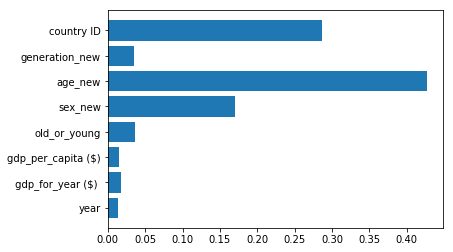

In [77]:
plt.barh(rfim['Fields'],rfim['Importance'] )

In [78]:
predictions_rf = model_rf.transform(test_data)

In [79]:
predictions_rf.select("features", "suicides/100k pop", "prediction").show(5)

+--------------------+------------------+------------------+
|            features| suicides/100k pop|        prediction|
+--------------------+------------------+------------------+
|(8,[0,1,2,5],[199...| 2.427454075039915|2.0648691314738303|
|(8,[0,1,2,5],[199...| 2.468946630209271| 1.679348289555292|
|(8,[0,1,2,5],[199...|1.7984040119467235|1.7093027964309442|
|(8,[0,1,2,5],[199...| 2.400618833265411|1.5704398677935874|
|(8,[0,1,2,5],[200...|1.5173226235262947|1.4777498778876628|
+--------------------+------------------+------------------+
only showing top 5 rows



In [103]:
from pyspark.ml.evaluation import RegressionEvaluator

In [104]:
evaluator = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="rmse")

In [105]:
rmse = evaluator.evaluate(predictions_rf)
print("RMSE of Random Forest Regression Model = %g" % rmse)

RMSE of Random Forest Regression Model = 0.399729


In [106]:
evaluator2 = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="r2")

r2 = evaluator2.evaluate(predictions_rf)

print("R-square of Random Forest Regression Model = %g" % r2)

R-square of Random Forest Regression Model = 0.916782


In [107]:
evaluator3 = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="mse")

mserf = evaluator3.evaluate(predictions_rf)

print("MSE of Random Forest Regression Model = %g" % mserf)

MSE of Random Forest Regression Model = 0.159783


In [108]:
evaluator4 = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="var")

varrf = evaluator2.evaluate(predictions_rf)

print("Explained variance of Random Forest Regression Model = %g" % varrf)

Explained variance of Random Forest Regression Model = 0.916782


In [ ]:
evaluator5 = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="mae")

maerf = evaluator5.evaluate(predictions_rf)

print("MAE of Random Forest Regression Model = %g" % maerf)

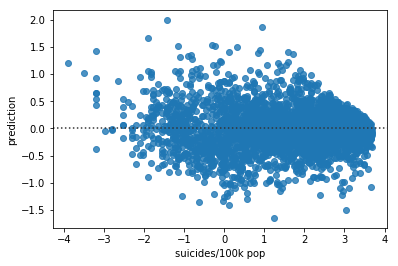

In [86]:
sns.residplot(predictions_rf.select("suicides/100k pop").toPandas(),predictions_rf.select("prediction").toPandas())

In [92]:
sparkdf = df_ad
sparkdf = sparkdf.withColumnRenamed('suicides/100k pop','label')
sparkdf.show(5)

+----+------------------+------------------+------------------+------------+-------+-------+--------------+----------+
|year|             label| gdp_for_year ($) |gdp_per_capita ($)|old_or_young|sex_new|age_new|generation_new|country ID|
+----+------------------+------------------+------------------+------------+-------+-------+--------------+----------+
|1987|1.9035989509835904|        2156624900|               796|           0|      1|      1|             2|      56.0|
|1987|1.6467336971777973|        2156624900|               796|           0|      1|      3|             5|      56.0|
|1987|1.5748464676644813|        2156624900|               796|           0|      0|      1|             2|      56.0|
|1987|1.5238800240724537|        2156624900|               796|           1|      1|      5|             1|      56.0|
|1987|1.1878434223960523|        2156624900|               796|           0|      1|      2|             0|      56.0|
+----+------------------+------------------+----

In [93]:
from pyspark.ml.feature import VectorAssembler

feature_list = []
for col in sparkdf.columns:
    if col == 'label':
        continue
    else:
        feature_list.append(col)

assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [94]:
feature_list

['year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'old_or_young',
 'sex_new',
 'age_new',
 'generation_new',
 'country ID']

In [95]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="label", featuresCol="features")

In [96]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler, rf])

In [97]:
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

In [98]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=5)

In [99]:
traindata,testdata = sparkdf.randomSplit([0.8,0.2])

In [102]:
cvModel = crossval.fit(traindata, maxBins = 101)
predictions = cvModel.transform(testdata)

TypeError: fit() got an unexpected keyword argument 'maxBins'

In [88]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorizer, dt])

NameError: name 'vectorizer' is not defined

In [ ]:
crossval = CrossValidator(estimator = pipeline,
                          estimatorParaMaps = paramGrid,
                          evaluator = RegressionEvaluator(),
                          numFolds=5)

In [ ]:
traindata, testdata = sparkdf.randomSplit([0.8,0.2])

In [114]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(labelCol="suicides/100k pop", maxBins = 101)

In [115]:
GBTmodel = gbt.fit(train_data)

In [116]:
GBTmodel.featureImportances

SparseVector(8, {0: 0.0691, 1: 0.015, 2: 0.0245, 3: 0.0095, 4: 0.075, 5: 0.1835, 6: 0.0131, 7: 0.6103})

In [117]:
gbtim = pd.DataFrame({'Fields':["year"," gdp_for_year ($) ", "gdp_per_capita ($)","old_or_young", "sex_new", "age_new", "generation_new","country ID"],'Importance':[0.0756,0.0212,0.0159,0.0137, 0.0865,0.1512,0.0106, 0.6253]},index=[0, 1, 2, 3,4,5,6,7])


In [118]:
print(gbtim)

               Fields  Importance
0                year      0.0756
1   gdp_for_year ($)       0.0212
2  gdp_per_capita ($)      0.0159
3        old_or_young      0.0137
4             sex_new      0.0865
5             age_new      0.1512
6      generation_new      0.0106
7          country ID      0.6253


In [119]:
# Make predictions.
predictions = GBTmodel.transform(test_data)

# Select example rows to display.
predictions.select("features", "suicides/100k pop", "prediction").show(5)

+--------------------+-------------------+------------------+
|            features|  suicides/100k pop|        prediction|
+--------------------+-------------------+------------------+
|(8,[0,1,2,5],[199...| 1.7984040119467235| 1.707435534094921|
|(8,[0,1,2,5],[199...| 1.4327007339340465|1.6584818891810023|
|(8,[0,1,2,6],[199...| 0.7178397931503168|0.5979217310347463|
|(8,[0,1,2,6],[199...| 0.7514160886839212|0.5979217310347463|
|(8,[0,1,2,6],[200...|0.01980262729617973|0.3765505683923975|
+--------------------+-------------------+------------------+
only showing top 5 rows



In [120]:
evaluatorgbt = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="rmse")
rmse = evaluatorgbt.evaluate(predictions)
print("RMSE of Gradient boosting Tree Regression Model = %g" % rmse)

RMSE of Gradient boosting Tree Regression Model = 0.410446


In [121]:
evaluatorgbt2 = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="r2")

r2gbt = evaluatorgbt2.evaluate(predictions)

print("R-square of Gradient boosting Tree Regression Model = %g" % r2gbt)

R-square of Gradient boosting Tree Regression Model = 0.911993


In [122]:
evaluatorgbt3 = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="mse")

msegbt = evaluatorgbt3.evaluate(predictions)

print("MSE of Random Gradient boosting Tree Regression Model = %g" % msegbt)

MSE of Random Gradient boosting Tree Regression Model = 0.168466


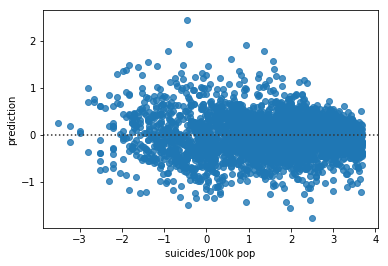

In [123]:
sns.residplot(predictions.select("suicides/100k pop").toPandas(),predictions.select("prediction").toPandas())

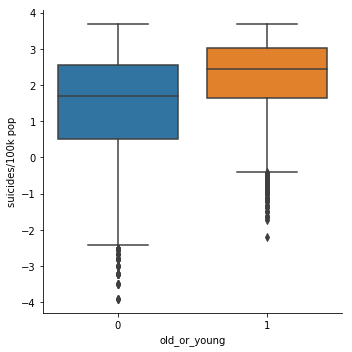

In [124]:
df_adp = df_ad.toPandas()
sns.catplot(x="old_or_young", y="suicides/100k pop", kind = "box",data=df_adp)

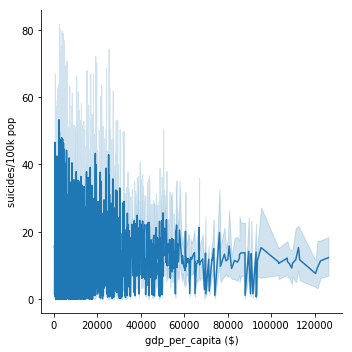

In [125]:
sns.relplot(x='gdp_per_capita ($)', y="suicides/100k pop", kind="line",data=dfp )


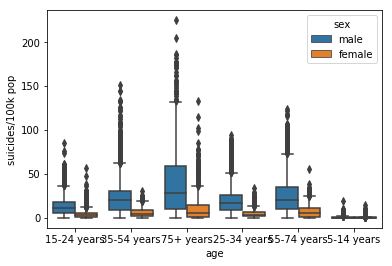

In [126]:
sns.boxplot(x="age", y="suicides/100k pop", hue="sex", data=dfp);
